# multistep regression classifier with stochasticity

Jingmeng

the general idea to solve the multiple output problem here is that we first predict one output, then use the output of that as an input and predict the other output(s)

an alternative to this is that we make a (very small) neural network which inherently supports (correlated) vector output

## model

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

df = pd.read_csv("F.txt", sep="\t", header=None)
dfV1 = pd.DataFrame(df.iloc[:,0])
dfV1 = dfV1.rename(columns={0:"v1"})

print(dfV1)

      v1
0      0
1      0
2      0
3      0
4      0
...   ..
3819   0
3820   0
3821   0
3822   0
3823   0

[3824 rows x 1 columns]


In [ ]:
dfV1["v1_octave"] = dfV1["v1"] //12
dfV1["v1_pitch_class"] = dfV1["v1"] % 12
dfV1

,v1,v1_octave,v1_pitch_class
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
3819,0,0,0
3820,0,0,0
3821,0,0,0
3822,0,0,0


In [ ]:
for i in range(1,30):
    dfV1["v1_octave_lag"+str(i)] = dfV1["v1_octave"].shift(i).fillna(0).astype(int)
    dfV1["v1_pitch_class_lag"+str(i)] = dfV1["v1_pitch_class"].shift(i).fillna(0).astype(int)

In [ ]:
dfV1

,v1,v1_octave,v1_pitch_class,v1_octave_lag1,v1_pitch_class_lag1,v1_octave_lag2,v1_pitch_class_lag2,v1_octave_lag3,v1_pitch_class_lag3,v1_octave_lag4,...,v1_octave_lag25,v1_pitch_class_lag25,v1_octave_lag26,v1_pitch_class_lag26,v1_octave_lag27,v1_pitch_class_lag27,v1_octave_lag28,v1_pitch_class_lag28,v1_octave_lag29,v1_pitch_class_lag29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,0,0,0,0,0,0,0,0,0,0,...,5,8,5,8,5,8,5,11,5,11
3820,0,0,0,0,0,0,0,0,0,0,...,5,8,5,8,5,8,5,8,5,11
3821,0,0,0,0,0,0,0,0,0,0,...,0,0,5,8,5,8,5,8,5,8
3822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,8,5,8,5,8


In [ ]:
rcv_pipe = make_pipeline(
    OneHotEncoder(),
    RidgeClassifierCV(alphas = [0.001, 0.01, 0.1, 1., 10.], cv = 10)
)
rcv_pipe

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                                   cv=10))])

In [ ]:
rcv_pipe.fit(X = dfV1[dfV1.columns.drop(['v1', 'v1_octave', 'v1_pitch_class'])], y = dfV1['v1_octave'])

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                                   cv=10))])

In [ ]:
rcv_pipe['ridgeclassifiercv'].alpha_

0.001

In [ ]:
rcv_pipe_pred = rcv_pipe.predict(X = dfV1[dfV1.columns.drop(['v1', 'v1_octave', 'v1_pitch_class'])])
rcv_pipe_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
d = rcv_pipe.decision_function(dfV1[dfV1.columns.drop(['v1', 'v1_octave', 'v1_pitch_class'])])
probs = [np.exp(i) / np.sum(np.exp(i)) for i in d]
probs[1:5]


[array([0.70458459, 0.09752076, 0.09973646, 0.0981582 ]),
 array([0.70458459, 0.09752076, 0.09973646, 0.0981582 ]),
 array([0.70458459, 0.09752076, 0.09973646, 0.0981582 ]),
 array([0.70458459, 0.09752076, 0.09973646, 0.0981582 ])]

In [ ]:
rcv_pipe.classes_

array([0, 4, 5, 6], dtype=int64)

In [ ]:
rcv_pipe2 = make_pipeline(
    OneHotEncoder(),
    RidgeClassifierCV(alphas = [0.001, 0.01, 0.1, 1., 10.], cv = 10)
)
rcv_pipe2.fit(X = dfV1[dfV1.columns.drop(['v1', 'v1_pitch_class'])], y = dfV1['v1_pitch_class'])

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                                   cv=10))])

In [ ]:
rcv_pipe2[1].alpha_

0.01

In [ ]:
rcv_pipe2_pred = rcv_pipe2.predict(X = dfV1[dfV1.columns.drop(['v1', 'v1_pitch_class'])])
rcv_pipe2_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
d2 = rcv_pipe2.decision_function(dfV1[dfV1.columns.drop(['v1', 'v1_pitch_class'])])
probs2 = [np.exp(i) / np.sum(np.exp(i)) for i in d2]
probs2[1:5]

[array([0.40167341, 0.05462185, 0.05439025, 0.05455053, 0.05438308,
        0.05425955, 0.0542678 , 0.0542993 , 0.05419047, 0.05457276,
        0.05442909, 0.05436192]),
 array([0.40167341, 0.05462185, 0.05439025, 0.05455053, 0.05438308,
        0.05425955, 0.0542678 , 0.0542993 , 0.05419047, 0.05457276,
        0.05442909, 0.05436192]),
 array([0.40167341, 0.05462185, 0.05439025, 0.05455053, 0.05438308,
        0.05425955, 0.0542678 , 0.0542993 , 0.05419047, 0.05457276,
        0.05442909, 0.05436192]),
 array([0.40167341, 0.05462185, 0.05439025, 0.05455053, 0.05438308,
        0.05425955, 0.0542678 , 0.0542993 , 0.05419047, 0.05457276,
        0.05442909, 0.05436192])]

## performance

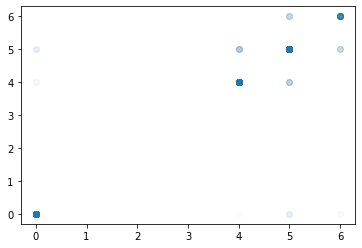

In [ ]:
plt.scatter(dfV1.v1_octave, rcv_pipe_pred, alpha = 0.01)

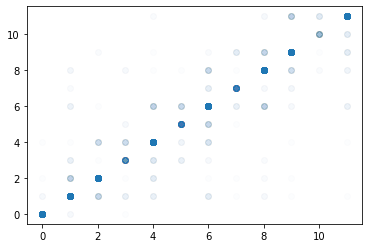

In [ ]:
plt.scatter(dfV1.v1_pitch_class, rcv_pipe2_pred, alpha = 0.01)

In [ ]:
from sklearn.metrics import roc_auc_score

Warning: the scores below are obtained withOUT splitting the training set and the testing set

In [ ]:
roc_auc_score(y_score=probs, y_true=dfV1.v1_octave, multi_class="ovr")

0.992945138682274

In [ ]:
roc_auc_score(y_score=probs2, y_true=dfV1.v1_pitch_class, multi_class="ovr")

0.9923763421231726

## prediction

In [ ]:
import numpy as np

In [ ]:
dfV1_pred = dfV1.iloc[1:3780]
len(dfV1_pred.iloc[-1,1:-2].values)

58

In [ ]:
dfV1_pred = dfV1.iloc[1:3780]
for i in range(100):
    # making the next row with blanks
    temp_next_row = pd.DataFrame([np.nan, np.nan, np.nan]+dfV1_pred.tail(1).iloc[:,1:-2].values.tolist()[0][:]).T
    temp_next_row.columns = dfV1_pred.columns
    dfV1_pred = dfV1_pred.append(temp_next_row, ignore_index=True)
    
    # predict the next octave
    temp_v1_octave = rcv_pipe.predict(X=dfV1_pred.tail(1).iloc[:,3:])
    dfV1_pred.iloc[-1,1] = temp_v1_octave
    # predict the next pitch class
    temp_v1_pitch_class = rcv_pipe2.predict(X=dfV1_pred.tail(1).loc[:,dfV1_pred.columns.drop(['v1', 'v1_pitch_class'])])
    dfV1_pred.iloc[-1,2] = temp_v1_pitch_class
    dfV1_pred.iloc[-1,0] = temp_v1_octave * 12 + temp_v1_pitch_class 

In [ ]:
dfV1_pred

,v1,v1_octave,v1_pitch_class,v1_octave_lag1,v1_pitch_class_lag1,v1_octave_lag2,v1_pitch_class_lag2,v1_octave_lag3,v1_pitch_class_lag3,v1_octave_lag4,...,v1_octave_lag25,v1_pitch_class_lag25,v1_octave_lag26,v1_pitch_class_lag26,v1_octave_lag27,v1_pitch_class_lag27,v1_octave_lag28,v1_pitch_class_lag28,v1_octave_lag29,v1_pitch_class_lag29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,66.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,...,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0
3875,66.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,...,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0
3876,66.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,...,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0
3877,66.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,...,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0


In [30]:
import random

In [59]:
dfV1_pred_stoc = dfV1.iloc[1:3780]
for i in range(100):
    # making the next row with blanks
    temp_next_row = pd.DataFrame([np.nan, np.nan, np.nan]+dfV1_pred_stoc.tail(1).iloc[:,1:-2].values.tolist()[0][:]).T
    temp_next_row.columns = dfV1_pred_stoc.columns
    dfV1_pred_stoc = dfV1_pred_stoc.append(temp_next_row, ignore_index=True)
    
    # predict the next octave, stochastically
    d = rcv_pipe.decision_function(dfV1_pred.tail(1).iloc[:,3:])
    probs = [np.exp(i) / np.sum(np.exp(i)) for i in d]
    temp_v1_octave = random.choices(rcv_pipe.classes_, weights=probs[0])[0]
    dfV1_pred_stoc.iloc[-1,1] = temp_v1_octave
    
    # predict the next pitch class, stochastically
    if(temp_v1_octave == 0):
        temp_v1_pitch_class = 0
    else:
        d2 = rcv_pipe2.decision_function(dfV1_pred.tail(1).loc[:,dfV1_pred.columns.drop(['v1', 'v1_pitch_class'])])
        probs2 = [np.exp(i) / np.sum(np.exp(i)) for i in d2]
        temp_v1_pitch_class = random.choices(rcv_pipe2.classes_, weights=probs2[0])[0]
    dfV1_pred_stoc.iloc[-1,2] = temp_v1_pitch_class
    dfV1_pred_stoc.iloc[-1,0] = temp_v1_octave * 12 + temp_v1_pitch_class 

In [60]:
dfV1_pred_stoc.tail()

,v1,v1_octave,v1_pitch_class,v1_octave_lag1,v1_pitch_class_lag1,v1_octave_lag2,v1_pitch_class_lag2,v1_octave_lag3,v1_pitch_class_lag3,v1_octave_lag4,...,v1_octave_lag25,v1_pitch_class_lag25,v1_octave_lag26,v1_pitch_class_lag26,v1_octave_lag27,v1_pitch_class_lag27,v1_octave_lag28,v1_pitch_class_lag28,v1_octave_lag29,v1_pitch_class_lag29
3874,61.0,5.0,1.0,6.0,2.0,5.0,7.0,5.0,8.0,4.0,...,4.0,7.0,0.0,0.0,5.0,10.0,5.0,8.0,5.0,6.0
3875,66.0,5.0,6.0,5.0,1.0,6.0,2.0,5.0,7.0,5.0,...,5.0,2.0,4.0,7.0,0.0,0.0,5.0,10.0,5.0,8.0
3876,63.0,5.0,3.0,5.0,6.0,5.0,1.0,6.0,2.0,5.0,...,0.0,0.0,5.0,2.0,4.0,7.0,0.0,0.0,5.0,10.0
3877,67.0,5.0,7.0,5.0,3.0,5.0,6.0,5.0,1.0,6.0,...,0.0,0.0,0.0,0.0,5.0,2.0,4.0,7.0,0.0,0.0
3878,66.0,5.0,6.0,5.0,7.0,5.0,3.0,5.0,6.0,5.0,...,5.0,10.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,7.0


## midi

In [72]:
from midiutil import MIDIFile

mymidi = MIDIFile(numTracks=1)
mymidi.addTempo(track = 0, time = 0, tempo = 60)
for i in range(3770, len(dfV1_pred_stoc)):
    for j in range(1):
        current_note = int(dfV1_pred_stoc.iloc[i,j])
        if(current_note == 0):
            continue
        mymidi.addNote(track = j, channel = 0, pitch = current_note, time = 0.1*(i-3770), duration = 0.1, volume = 100)

with open("pred_stoc.mid", "wb") as output_file:
    mymidi.writeFile(output_file)

this sounds meaningful, yet changing too fast

let's revise the softmax a bit

In [75]:
dfV1_pred_stoc = dfV1.iloc[1:3780]
for i in range(100):
    # making the next row with blanks
    temp_next_row = pd.DataFrame([np.nan, np.nan, np.nan]+dfV1_pred_stoc.tail(1).iloc[:,1:-2].values.tolist()[0][:]).T
    temp_next_row.columns = dfV1_pred_stoc.columns
    dfV1_pred_stoc = dfV1_pred_stoc.append(temp_next_row, ignore_index=True)
    
    # predict the next octave, stochastically
    d = rcv_pipe.decision_function(dfV1_pred.tail(1).iloc[:,3:])
    probs = [np.exp(2*i) / np.sum(np.exp(2*i)) for i in d]
    temp_v1_octave = random.choices(rcv_pipe.classes_, weights=probs[0])[0]
    dfV1_pred_stoc.iloc[-1,1] = temp_v1_octave
    
    # predict the next pitch class, stochastically
    if(temp_v1_octave == 0):
        temp_v1_pitch_class = 0
    else:
        d2 = rcv_pipe2.decision_function(dfV1_pred.tail(1).loc[:,dfV1_pred.columns.drop(['v1', 'v1_pitch_class'])])
        probs2 = [np.exp(2*i) / np.sum(np.exp(2*i)) for i in d2]
        temp_v1_pitch_class = random.choices(rcv_pipe2.classes_, weights=probs2[0])[0]
    dfV1_pred_stoc.iloc[-1,2] = temp_v1_pitch_class
    dfV1_pred_stoc.iloc[-1,0] = temp_v1_octave * 12 + temp_v1_pitch_class 

In [85]:
from midiutil import MIDIFile

mymidi = MIDIFile(numTracks=1)
mymidi.addTempo(track = 0, time = 0, tempo = 60)
duration=[0,0,0,0]
for i in range(3670, len(dfV1_pred_stoc)):
    for j in range(1):
        current_note = int(dfV1_pred_stoc.iloc[i,j])
        if(current_note == 0):
            continue
        if(i<len(dfV1_pred_stoc)-1):
            if(current_note == int(dfV1_pred_stoc.iloc[i+1,j])):
                duration[j] = duration[j] +1
                continue
        mymidi.addNote(track = j, channel = 0, pitch = current_note, time = 0.1*(i-duration[j]-3670), 
                       duration = 0.1*(duration[j]+1), volume = 100)
        duration[j]=0

with open("pred_stoc2.mid", "wb") as output_file:
    mymidi.writeFile(output_file)

now it's at least music-like!